In [95]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

variables


1.   df
2.   df_cat
3.   df_num
4.   df_num_scaled    array
5.   df_scaled
6.   df_pca           array
7.   pca_df
8.   df_final_num
9.   df_final


In [96]:
df=pd.read_csv('dataset.csv')

In [97]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [99]:
df["track_id"].duplicated().sum()

np.int64(24259)

In [100]:
df=df.drop_duplicates(subset="track_id")

In [101]:
features_num=['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature']
features_cat=['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'track_genre']
df=df.drop(['Unnamed: 0'], axis=1)


In [102]:
df_cat=df[features_cat]

<Figure size 2500x2500 with 0 Axes>

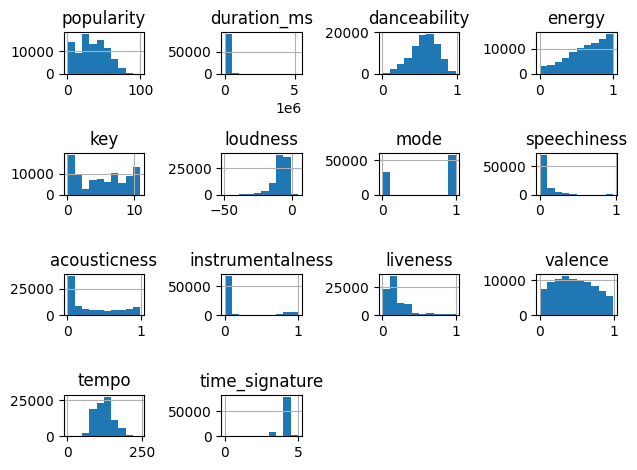

In [103]:
plt.figure(figsize=(25,25))
df.hist()
plt.tight_layout()
plt.show()

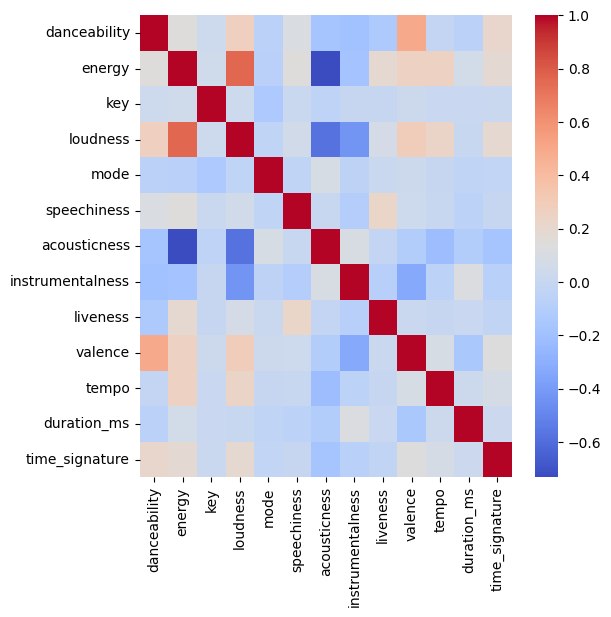

In [104]:
df_corr=df[features_num].corr()
plt.figure(figsize=(6, 6))
sns.heatmap(df_corr, cmap='coolwarm')
plt.show()

Text(0, 0.5, 'loudness')

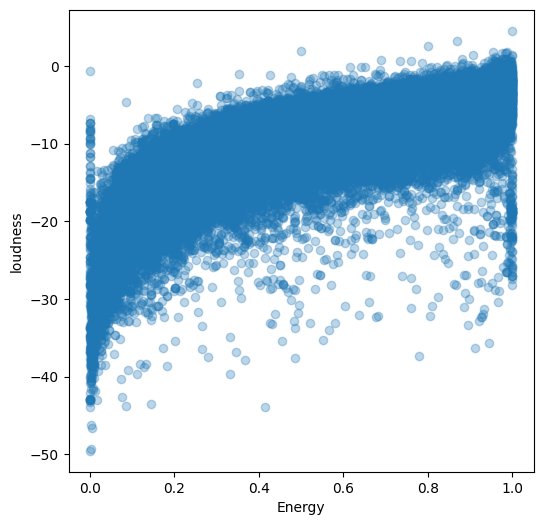

In [105]:
plt.figure(figsize=(6, 6))
plt.scatter(df["energy"], df["loudness"], alpha=0.3)
plt.xlabel("Energy")
plt.ylabel("loudness")

Text(0, 0.5, 'liveness')

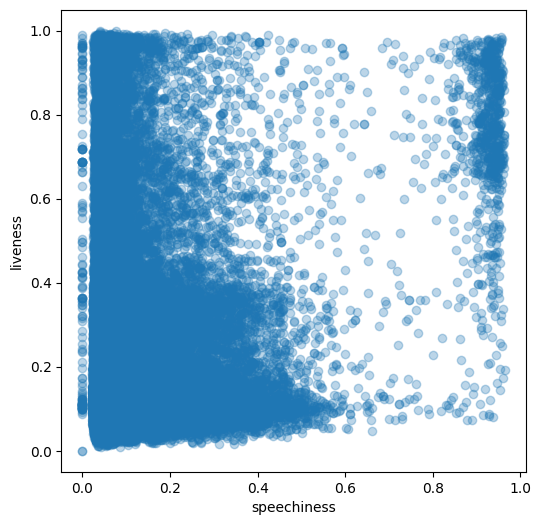

In [106]:
plt.figure(figsize=(6, 6))
plt.scatter(df["speechiness"], df["liveness"], alpha=0.3)
plt.xlabel("speechiness")
plt.ylabel("liveness")

Text(0, 0.5, 'valence')

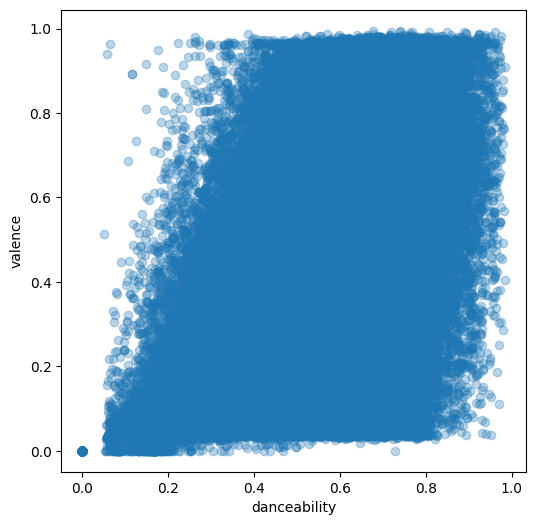

In [107]:
plt.figure(figsize=(6, 6))
plt.scatter(df["danceability"], df["valence"], alpha=0.3)
plt.xlabel("danceability")
plt.ylabel("valence")

In [108]:
df_num=df[features_num]
scale=StandardScaler()
df_num_scaled=scale.fit_transform(df_num)

In [109]:
df_num_scaled

array([[ 0.64425952, -0.67597615, -1.20328584, ..., -1.13360904,
         0.0134947 ,  0.22621456],
       [-0.8046043 , -1.82560939, -1.20328584, ..., -1.47985447,
        -0.70415091,  0.22621456],
       [-0.70273106, -1.07347646, -1.48419444, ..., -1.51827085,
        -0.16216273,  0.22621456],
       ...,
       [ 0.37825718, -1.19038831, -1.48419444, ...,  0.34264897,
         0.37472572,  0.22621456],
       [ 0.14055296, -0.50060837,  0.48216576, ...,  0.46158368,
         0.48475067,  0.22621456],
       [-0.20468412, -0.57465254, -1.20328584, ..., -1.4231098 ,
         0.11230201,  0.22621456]])

In [110]:
df_scaled=pd.DataFrame(df_num_scaled, columns=df_num.columns)

In [111]:
df_scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.644260,-0.675976,-1.203286,0.335731,-1.324600,0.490464,-0.875177,-0.535478,0.723666,0.934036,-1.133609,0.013495,0.226215
1,-0.804604,-1.825609,-1.203286,-1.673094,0.754945,-0.098361,1.760797,-0.535464,-0.595072,-0.770280,-1.479854,-0.704151,0.226215
2,-0.702731,-1.073476,-1.484194,-0.236523,0.754945,-0.280217,-0.349638,-0.535481,-0.512971,-1.329508,-1.518271,-0.162163,0.226215
3,-1.676186,-2.240257,-1.484194,-1.918236,0.754945,-0.451480,1.704637,-0.535263,-0.436002,-1.242010,1.981637,-0.240899,-1.979187
4,0.316001,-0.746123,-0.922377,-0.226373,0.754945,-0.307584,0.415912,-0.535481,-0.687948,-1.150708,-0.070037,-0.268168,0.226215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89736,-2.208191,-1.556712,-0.079651,-1.511837,0.754945,-0.399395,0.921352,2.330077,-0.670501,-1.657057,0.130711,1.379913,2.431616
89737,-2.196872,-2.016565,-1.484194,-1.880508,-1.324600,-0.417934,1.967702,2.478296,-0.574547,-1.652872,-1.222528,1.379922,0.226215
89738,0.378257,-1.190388,-1.484194,-0.458875,-1.324600,-0.401160,1.592317,-0.535481,-0.682816,1.040556,0.342649,0.374726,0.226215
89739,0.140553,-0.500608,0.482166,-0.457725,0.754945,-0.509744,0.155803,-0.535481,0.272114,-0.214856,0.461584,0.484751,0.226215


In [112]:
n=10
pca=PCA(n_components=n)
df_pca=pca.fit_transform(df_scaled)
df_pca

array([[ 0.73074459,  0.86286707,  0.42096497, ..., -0.26021528,
        -1.01292808,  0.34075331],
       [-3.16725767,  1.48529116,  0.34386991, ..., -0.90886557,
        -0.53332031, -0.98697409],
       [-1.35296906,  0.01576605,  0.06261583, ..., -1.25434302,
        -0.15210292, -1.2628123 ],
       ...,
       [-0.91401479,  1.50154504, -0.79998984, ...,  1.01711565,
        -2.07330794,  0.07777089],
       [-0.33189399,  0.09102464, -0.14030957, ...,  0.27923077,
        -0.20950606, -0.0188753 ],
       [-0.81114248,  1.28907912, -0.3793267 , ..., -0.22391147,
        -1.45884073, -0.23202807]])

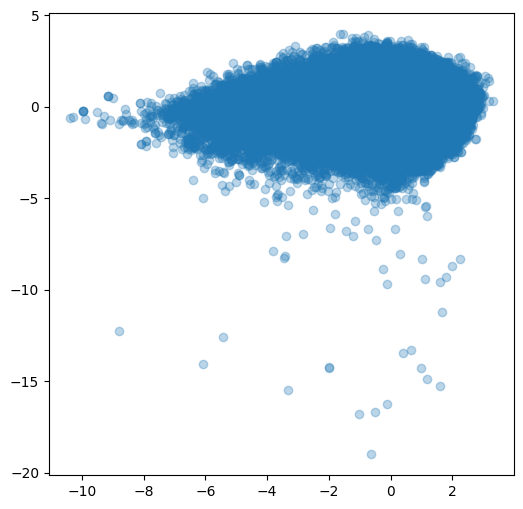

In [113]:
plt.figure(figsize=(6,6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.3)

In [114]:
pca_df = pd.DataFrame(
   df_pca,
    columns=[f"pc_{i+1}" for i in range (n)],
)


In [115]:
pca_df

,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
0,0.730745,0.862867,0.420965,-0.632678,1.258675,-0.510007,-1.295860,-0.260215,-1.012928,0.340753
1,-3.167258,1.485291,0.343870,0.957251,0.584617,-0.078574,-0.121053,-0.908866,-0.533320,-0.986974
2,-1.352969,0.015766,0.062616,1.339304,0.876014,-0.793135,-0.679077,-1.254343,-0.152103,-1.262812
3,-3.635848,-0.144618,0.752450,2.116618,-1.608983,0.978851,-0.305792,1.737178,-1.201494,-0.639979
4,-0.894505,0.469259,-0.320245,1.149840,0.279364,0.133166,-0.173647,-0.286968,-0.123870,-1.023879
...,...,...,...,...,...,...,...,...,...,...
89736,-3.238779,-1.968762,-1.390704,0.572235,1.621350,1.716679,1.784641,-0.968040,0.034584,-0.412573
89737,-4.787999,-1.601710,-0.798711,-0.321884,1.686880,0.447563,-0.832766,-0.279377,-1.135931,0.006403
89738,-0.914015,1.501545,-0.799990,0.142980,0.544392,0.509374,-0.751101,1.017116,-2.073308,0.077771
89739,-0.331894,0.091025,-0.140310,0.409003,-0.116883,-0.102764,1.234928,0.279231,-0.209506,-0.018875


In [116]:
df_final_num=pd.concat([ df_num,pca_df], axis=1)

In [117]:
df_final_num

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10
0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,230666.0,4.0,0.730745,0.862867,0.420965,-0.632678,1.258675,-0.510007,-1.295860,-0.260215,-1.012928,0.340753
1,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,149610.0,4.0,-3.167258,1.485291,0.343870,0.957251,0.584617,-0.078574,-0.121053,-0.908866,-0.533320,-0.986974
2,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,210826.0,4.0,-1.352969,0.015766,0.062616,1.339304,0.876014,-0.793135,-0.679077,-1.254343,-0.152103,-1.262812
3,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,201933.0,3.0,-3.635848,-0.144618,0.752450,2.116618,-1.608983,0.978851,-0.305792,1.737178,-1.201494,-0.639979
4,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,198853.0,4.0,-0.894505,0.469259,-0.320245,1.149840,0.279364,0.133166,-0.173647,-0.286968,-0.123870,-1.023879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.238779,-1.968762,-1.390704,0.572235,1.621350,1.716679,1.784641,-0.968040,0.034584,-0.412573
89737,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.787999,-1.601710,-0.798711,-0.321884,1.686880,0.447563,-0.832766,-0.279377,-1.135931,0.006403
89738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.914015,1.501545,-0.799990,0.142980,0.544392,0.509374,-0.751101,1.017116,-2.073308,0.077771
89739,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.331894,0.091025,-0.140310,0.409003,-0.116883,-0.102764,1.234928,0.279231,-0.209506,-0.018875


In [118]:
df_final=pd.concat([df_final_num, df_cat], axis=1)
df_final.head(10)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,pc_10,track_id,artists,album_name,track_name,explicit,track_genre
0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,230666.0,4.0,0.730745,0.862867,0.420965,-0.632678,1.258675,-0.510007,-1.295860,-0.260215,-1.012928,0.340753,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,False,acoustic
1,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,149610.0,4.0,-3.167258,1.485291,0.343870,0.957251,0.584617,-0.078574,-0.121053,-0.908866,-0.533320,-0.986974,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,False,acoustic
2,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,210826.0,4.0,-1.352969,0.015766,0.062616,1.339304,0.876014,-0.793135,-0.679077,-1.254343,-0.152103,-1.262812,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,False,acoustic
3,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,201933.0,3.0,-3.635848,-0.144618,0.752450,2.116618,-1.608983,0.978851,-0.305792,1.737178,-1.201494,-0.639979,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,False,acoustic
4,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,198853.0,4.0,-0.894505,0.469259,-0.320245,1.149840,0.279364,0.133166,-0.173647,-0.286968,-0.123870,-1.023879,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,False,acoustic
5,0.688,0.4810,6.0,-8.807,1.0,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,214240.0,4.0,0.142072,1.359269,-0.052604,0.090611,0.388303,-0.565644,0.447382,-0.108352,0.454429,-0.109838,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,False,acoustic
6,0.407,0.1470,2.0,-8.822,1.0,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,229400.0,3.0,-2.596123,0.008191,0.478052,1.542844,-1.226729,-0.390533,-0.423601,1.129536,-0.623536,-1.138140,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,False,acoustic
7,0.703,0.4440,11.0,-9.331,1.0,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,242946.0,4.0,0.080523,1.287454,-0.905123,-0.196306,-0.945979,0.225674,1.757731,0.910798,0.233274,0.004450,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,False,acoustic
8,0.625,0.4140,0.0,-8.700,1.0,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,189613.0,4.0,-0.009918,1.182715,-0.293302,1.602516,0.334135,0.232064,-0.364937,0.188868,-0.412328,0.107979,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,False,acoustic
9,0.442,0.6320,1.0,-6.770,1.0,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,205594.0,4.0,-0.736008,0.038422,-0.071706,1.339990,0.540847,-0.929778,-0.561954,-1.271030,-0.106188,-1.162020,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,False,acoustic
